In [1]:
import pandas as pd
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt

od.download('https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data')

Skipping, found downloaded files in ".\unlock-profits-with-e-commerce-sales-data" (use force=True to force download)


In [2]:
data = pd.read_csv('./unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv',encoding= 'unicode_escape')
data.head()

c:\Users\Yael Aguilar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [14]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

<Axes: xlabel='Category', ylabel='count'>

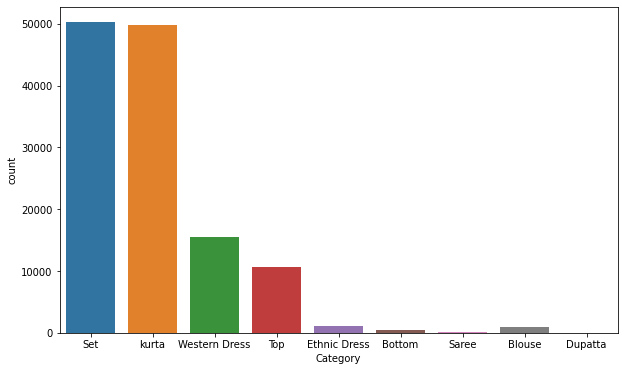

In [72]:
#Most wanted categories.
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='Category', data= data)

<Axes: xlabel='Category', ylabel='count'>

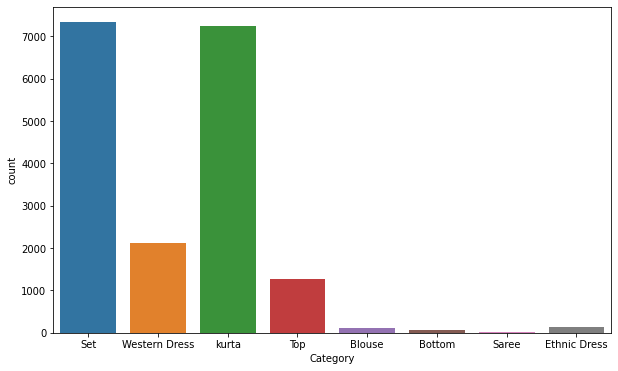

In [60]:
#Categories with more oders cancelled.

cancelled = data[data['Status']== 'Cancelled']
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='Category', data= cancelled)

<Axes: xlabel='Size', ylabel='count'>

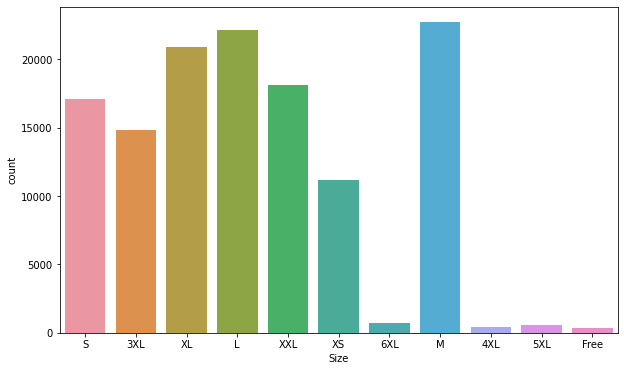

In [61]:
#Sizes with more orders 
data.Size.value_counts()
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='Size', data= data)

<Axes: xlabel='Size', ylabel='count'>

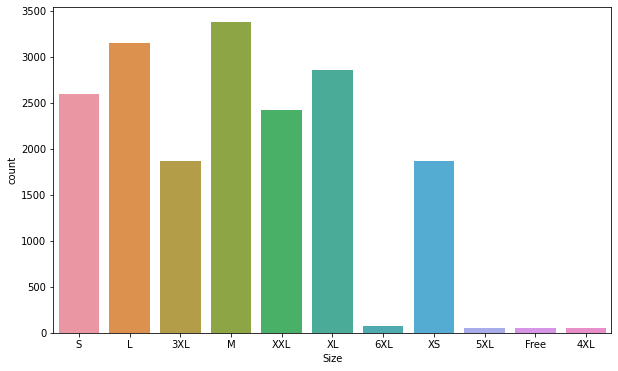

In [67]:
#most orders cancelled by size 
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='Size', data= cancelled)

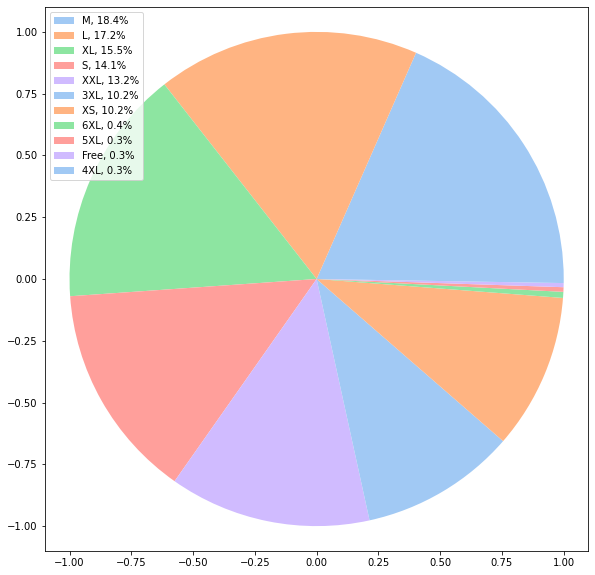

In [91]:
#most orders cancelled by size 
fig, ax = plt.subplots(figsize = (10,10))
colors = sns.color_palette('pastel')[0:5]
cancelled = data[data['Status']== 'Cancelled']
labels = ['M', 'L', 'XL', 'S', 'XXL', '3XL', 'XS', '6XL', '5XL', 'Free', '4XL']
plt.pie(cancelled['Size'].value_counts(),  colors= colors, frame=True )
plt.legend(loc = 'upper left',
           labels = ['%s, %1.1f%%' %(l, float(s) * 100) for l,s in zip(labels, cancelled['Size'].value_counts(normalize=True))]
           )
plt.show()

In [97]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

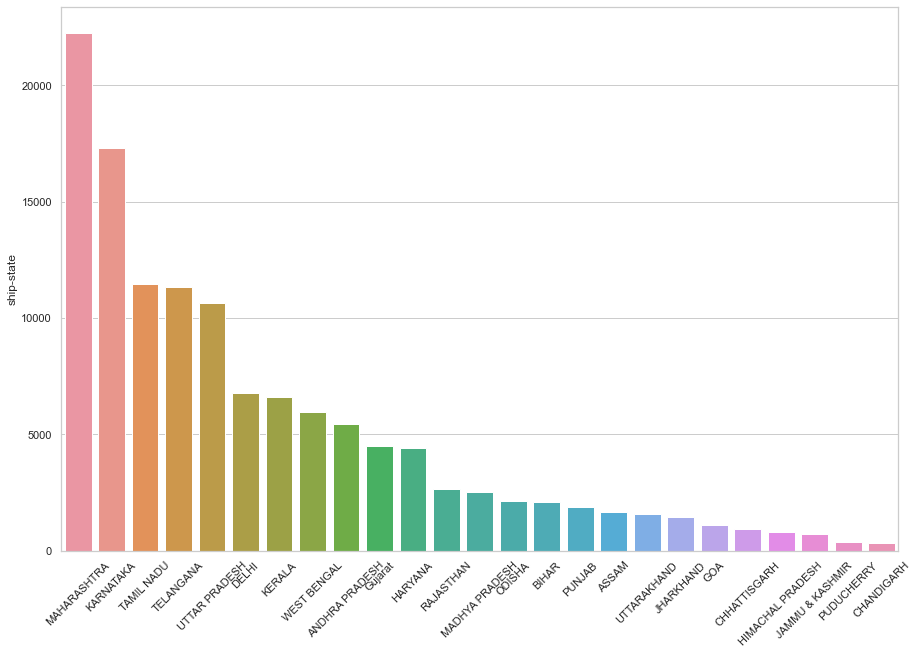

In [75]:
#whatss the ship-state with more orders 


fig, ax = plt.subplots(figsize = (15,10))

sns.barplot(x=data['ship-state'].value_counts()[:25].index, y=data['ship-state'].value_counts()[:25])
plt.xticks(rotation=45)
plt.show()

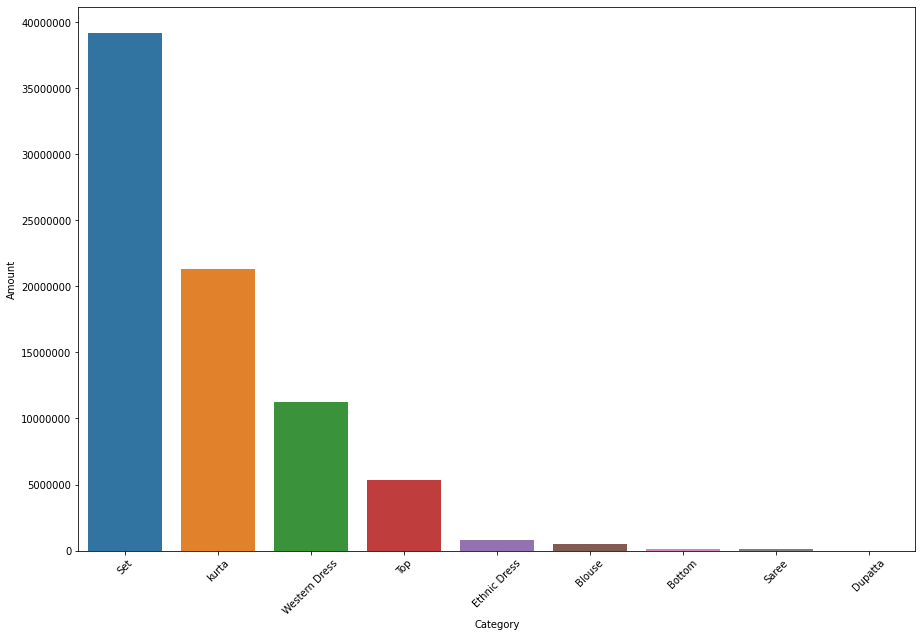

In [122]:

#amount spended  by size,  by category, by city, aqui te quedaste, aparte haz un violin plot. 


fig, ax = plt.subplots(figsize = (15,10))

sns.barplot(x=data.groupby('Category')['Amount'].sum().sort_values(ascending=False).index, y=data.groupby('Category')['Amount'].sum().sort_values(ascending=False))
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [121]:
data.groupby('Category')['Amount'].sum().sort_values(ascending=False)


Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Top               5347792.30
Ethnic Dress       791217.66
Blouse             458408.18
Bottom             150667.98
Saree              123933.76
Dupatta               915.00
Name: Amount, dtype: float64

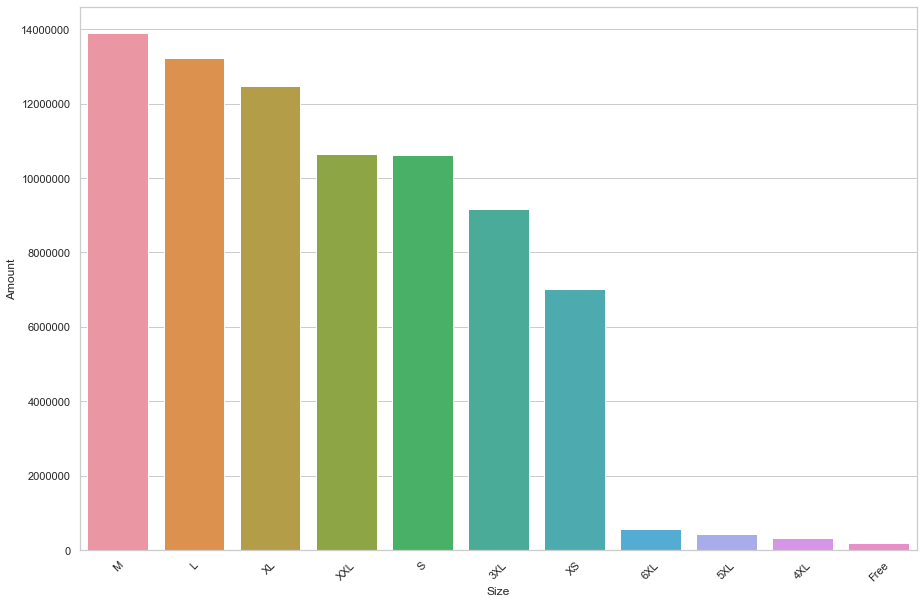

In [76]:
fig, ax = plt.subplots(figsize = (15,10))

sns.barplot(x=data.groupby('Size')['Amount'].sum().sort_values(ascending=False).index, y=data.groupby('Size')['Amount'].sum().sort_values(ascending=False))
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

BENGALURU    11217
HYDERABAD     8074
MUMBAI        6126
NEW DELHI     5795
CHENNAI       5421
PUNE          3857
KOLKATA       2381
GURUGRAM      1868
THANE         1701
LUCKNOW       1458
Name: ship-city, dtype: int64


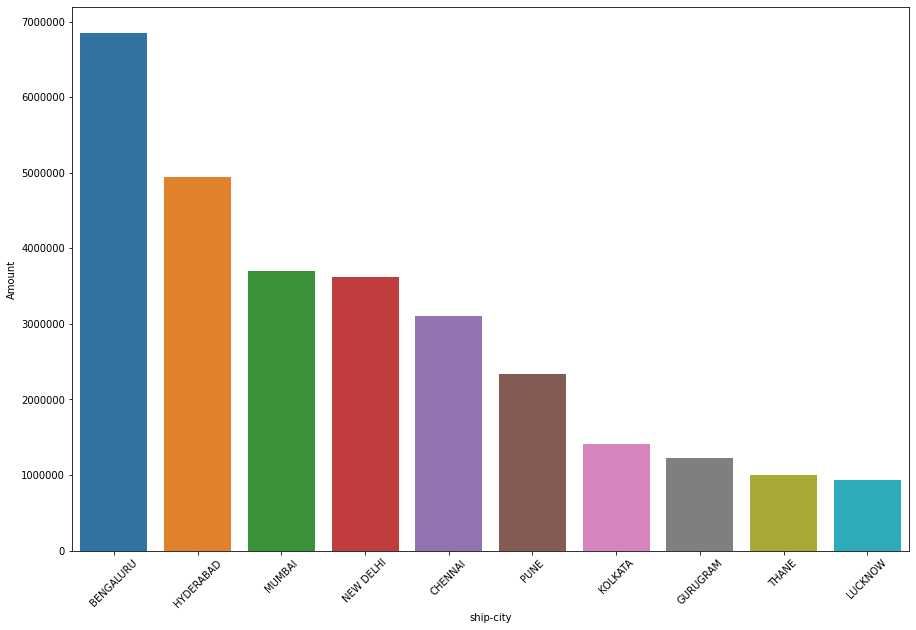

In [67]:
print(data['ship-city'].value_counts()[0:10])

fig, ax = plt.subplots(figsize = (15,10))

sns.barplot(x=data.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)[:10].index, y=data.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)[:10])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [8]:
#Day of the week with more orders, I would have do it with Months to but theres only two months.

data['Date'] = pd.to_datetime(data['Date'])
data['day'] = data['Date'].dt.day_name()
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,day
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,Saturday
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,Saturday
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,Saturday
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,Saturday
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,Saturday


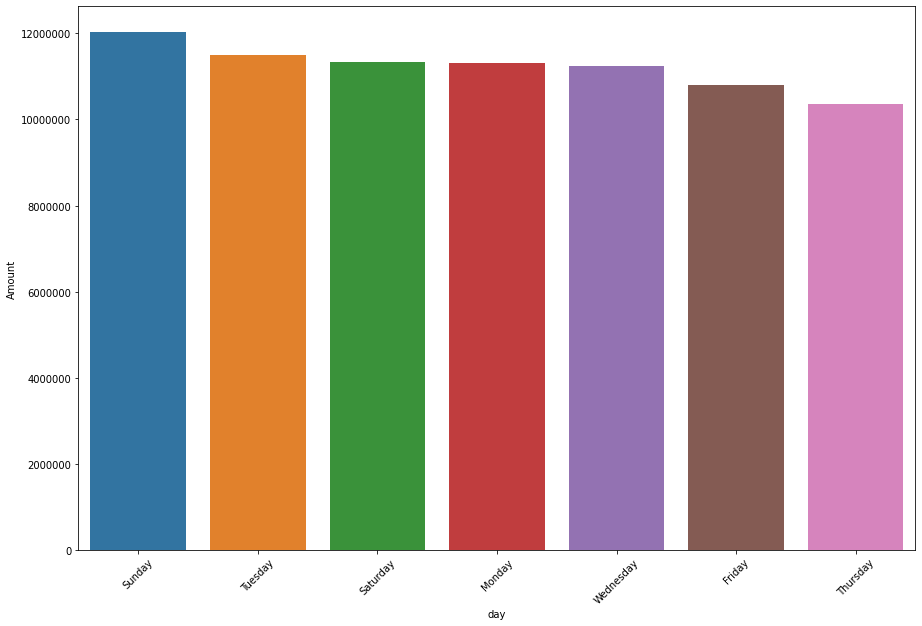

In [69]:

#amount by day total
fig, ax = plt.subplots(figsize = (15,10))

sns.barplot(x=data.groupby('day')['Amount'].sum().sort_values(ascending=False).index, y=data.groupby('day')['Amount'].sum().sort_values(ascending=False))
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


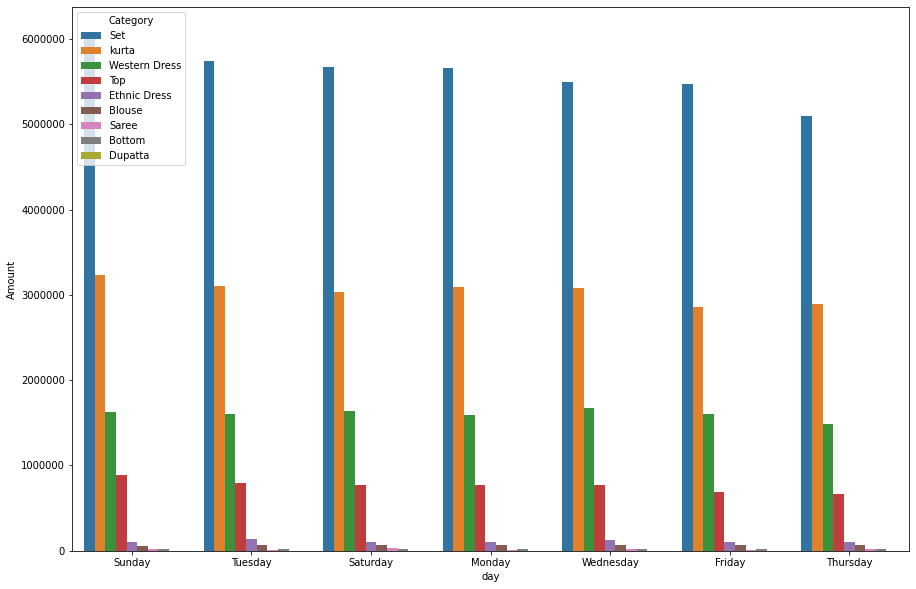

In [61]:

fig, ax = plt.subplots(figsize = (15,10))
data_by_day = data.groupby(['day', 'Category'])['Amount'].sum().sort_values(ascending=False)
data_by_day =data_by_day.reset_index()

sns.barplot(x= 'day', y = 'Amount', hue = 'Category', data = data_by_day)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


Skipping, found downloaded files in ".\unlock-profits-with-e-commerce-sales-data" (use force=True to force download)


c:\Users\Yael Aguilar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


((<Axes: xlabel='Category', ylabel='count'>, <Axes: xlabel='Category', ylabel='count'>, <Axes: xlabel='Size', ylabel='count'>, <Axes: xlabel='Size', ylabel='count'>, <Axes: ylabel='ship-state'>, <Axes: xlabel='Category', ylabel='Amount'>, <Axes: xlabel='Size', ylabel='Amount'>, <Axes: xlabel='ship-city', ylabel='Amount'>, <Axes: xlabel='day', ylabel='Amount'>, <Axes: xlabel='day', ylabel='Amount'>),)
(<Axes: xlabel='Category', ylabel='count'>, <Axes: xlabel='Category', ylabel='count'>, <Axes: xlabel='Size', ylabel='count'>, <Axes: xlabel='Size', ylabel='count'>, <Axes: ylabel='ship-state'>, <Axes: xlabel='Category', ylabel='Amount'>, <Axes: xlabel='Size', ylabel='Amount'>, <Axes: xlabel='ship-city', ylabel='Amount'>, <Axes: xlabel='day', ylabel='Amount'>, <Axes: xlabel='day', ylabel='Amount'>)


AttributeError: 'tuple' object has no attribute 'get_figure'

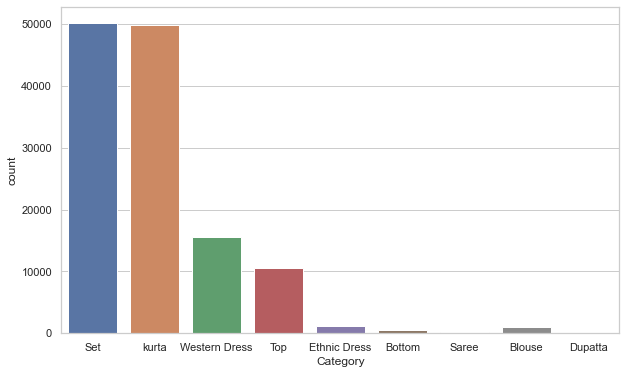

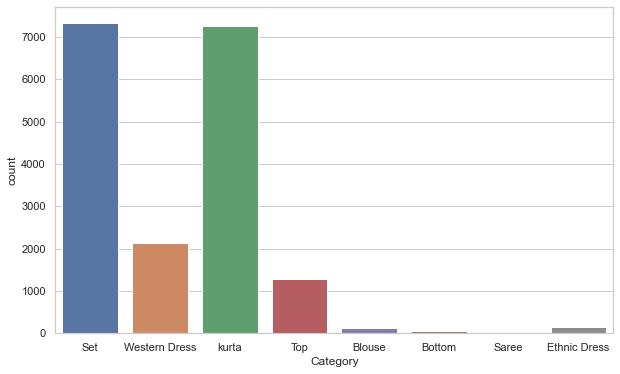

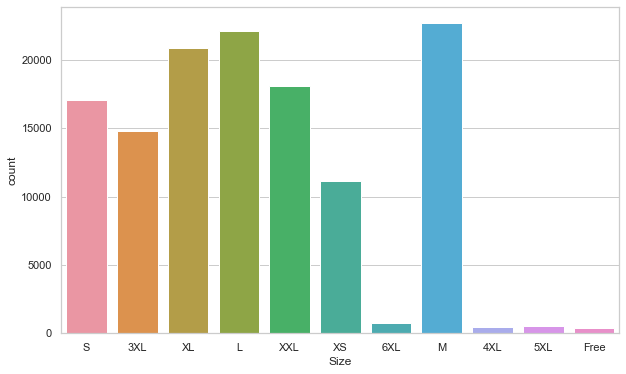

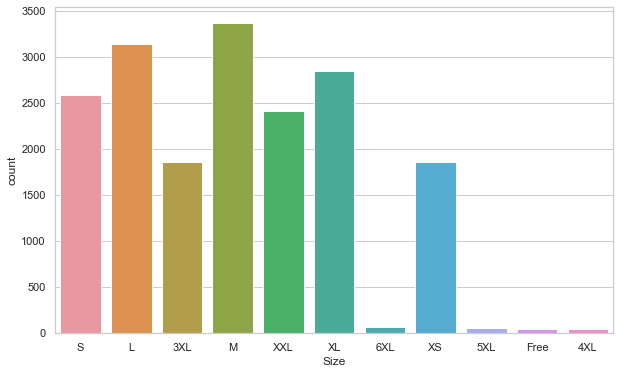

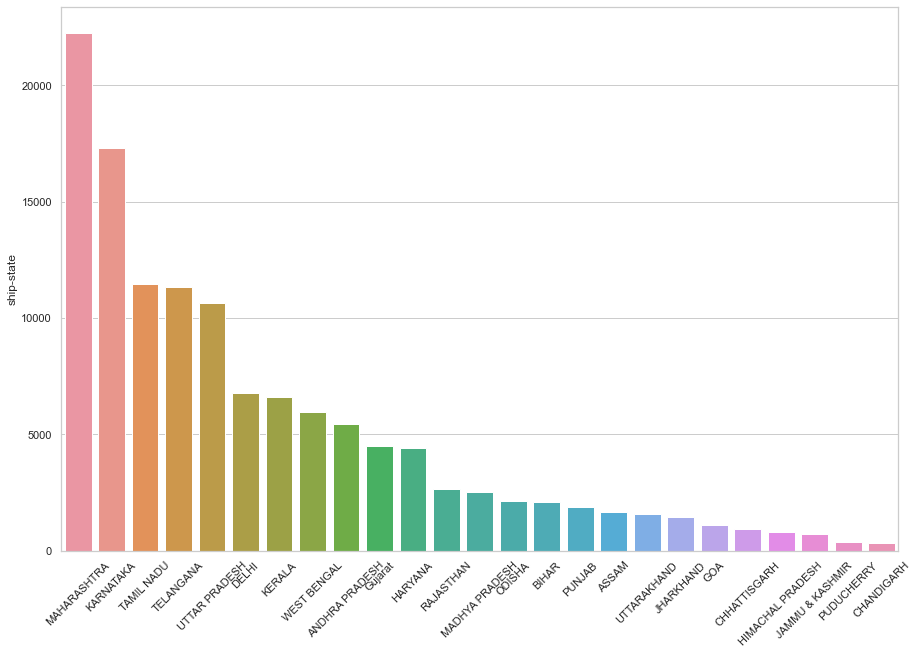

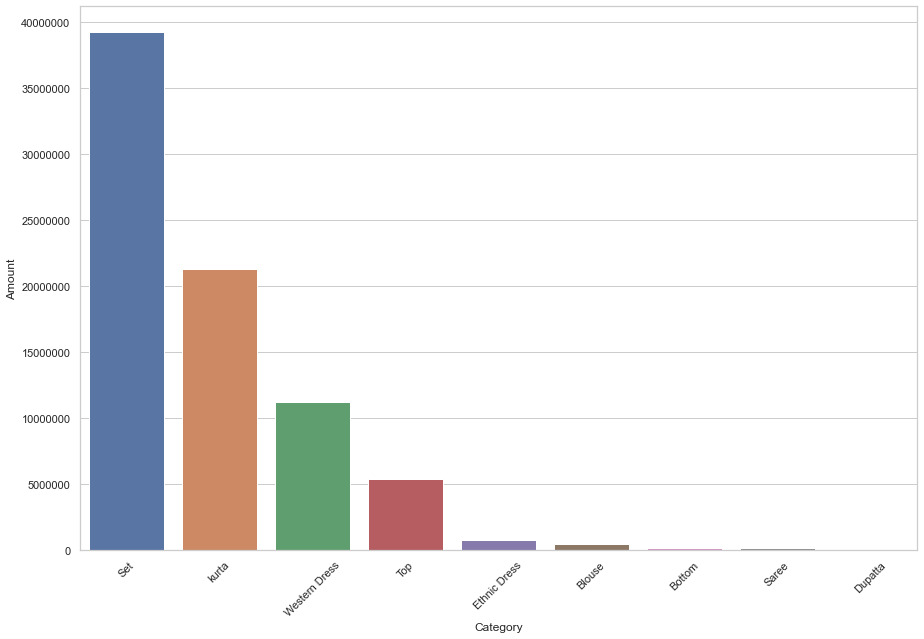

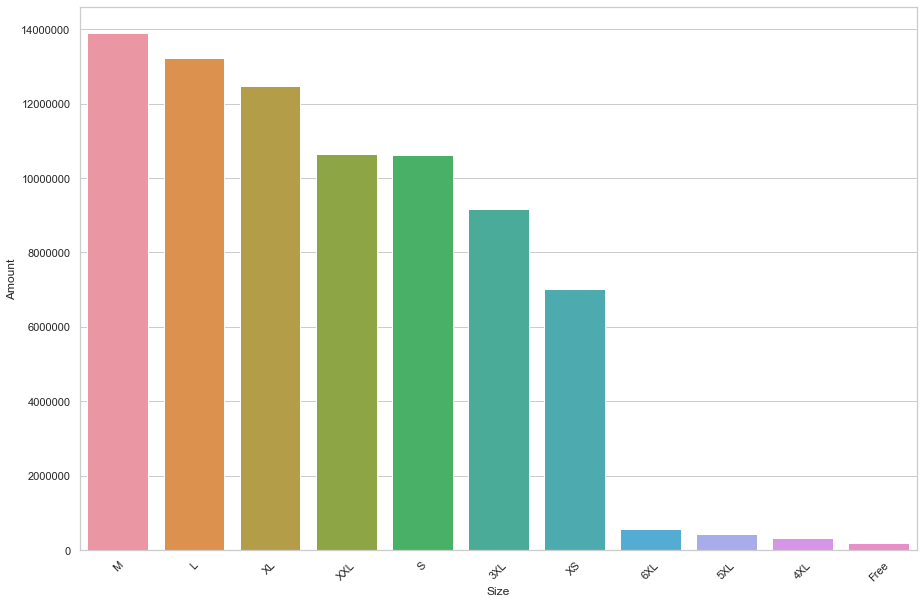

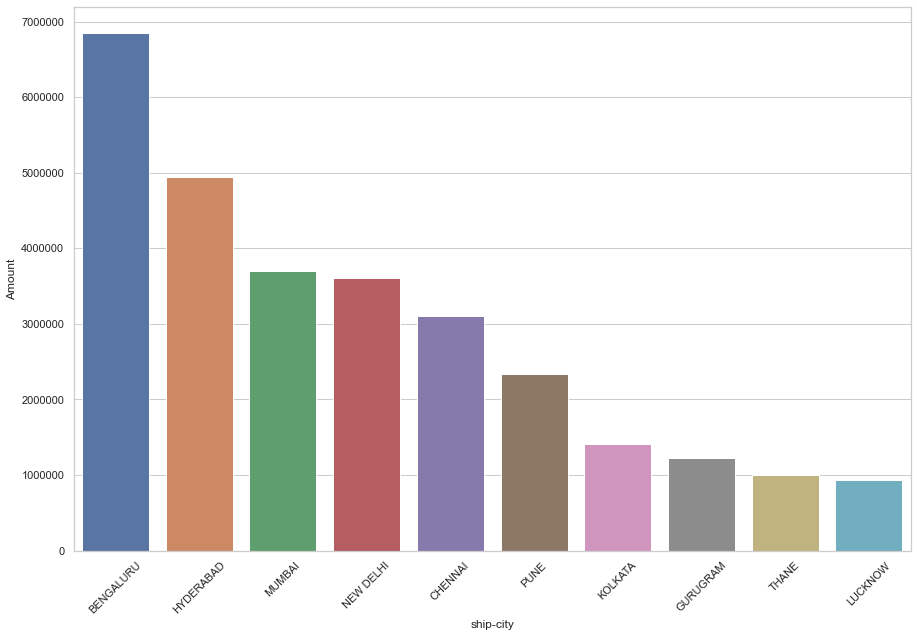

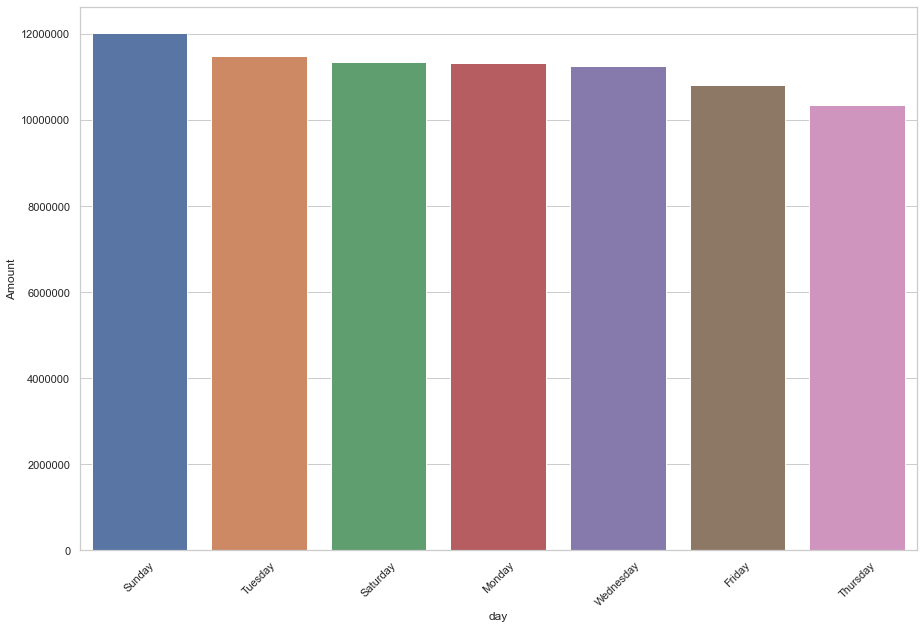

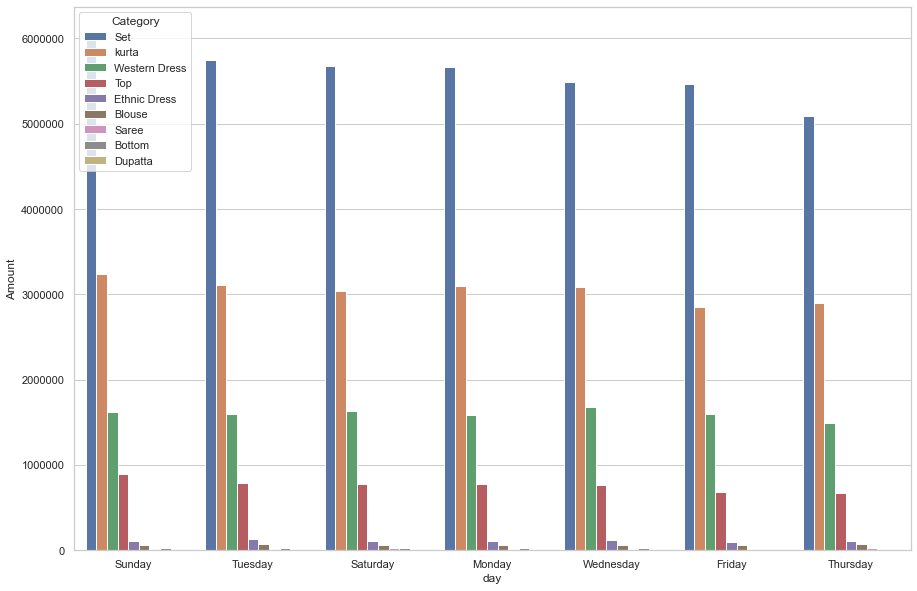

In [80]:
import pandas as pd
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt



def aquire():
    od.download('https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data')
    data = pd.read_csv('./unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv',encoding= 'unicode_escape')
    return data

def wrangle(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['day'] = data['Date'].dt.day_name()
    return data

def visualize(data):
    #Most wanted categories.
    fig, ax = plt.subplots(figsize = (10,6))
    most_wanted_categories = sns.countplot(x='Category', data= data)

    #Categories with more oders cancelled.

    cancelled = data[data['Status']== 'Cancelled']
    fig, ax = plt.subplots(figsize = (10,6))
    more_categories_canceled = sns.countplot(x='Category', data= cancelled)

    #Sizes with more orders 

    data.Size.value_counts()
    fig, ax = plt.subplots(figsize = (10,6))
    sizes_orders = sns.countplot(x='Size', data= data)

    #most orders cancelled by size 
    fig, ax = plt.subplots(figsize = (10,6))
    most_cancelled_size = sns.countplot(x='Size', data= cancelled)

    #whatss the ship-state with more orders 

    fig, ax = plt.subplots(figsize = (15,10))
    plt.xticks(rotation=45)
    ship_state_orders = sns.barplot(x=data['ship-state'].value_counts()[:25].index, y=data['ship-state'].value_counts()[:25])
    

    #amount spended  by size,  by category, by city, aqui te quedaste, aparte haz un violin plot. 


    fig, ax = plt.subplots(figsize = (15,10))
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')

    amount_by_category = sns.barplot(x=data.groupby('Category')['Amount'].sum().sort_values(ascending=False).index, y=data.groupby('Category')['Amount'].sum().sort_values(ascending=False))
    
    

    #Amount by Size
    fig, ax = plt.subplots(figsize = (15,10))
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')
    amount_by_size = sns.barplot(x=data.groupby('Size')['Amount'].sum().sort_values(ascending=False).index, y=data.groupby('Size')['Amount'].sum().sort_values(ascending=False))
    

    #Amount by Ship City
    fig, ax = plt.subplots(figsize = (15,10))
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')
    amount_by_city = sns.barplot(x=data.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)[:10].index, y=data.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)[:10])
    

    #amount by day total
    fig, ax = plt.subplots(figsize = (15,10))
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')
    amount_by_day = sns.barplot(x=data.groupby('day')['Amount'].sum().sort_values(ascending=False).index, y=data.groupby('day')['Amount'].sum().sort_values(ascending=False))
    

    #AMount by category by day
    fig, ax = plt.subplots(figsize = (15,10))
    data_by_day = data.groupby(['day', 'Category'])['Amount'].sum().sort_values(ascending=False)
    data_by_day =data_by_day.reset_index()
    plt.ticklabel_format(style='plain', axis='y')
    amount_category_day = sns.barplot(x= 'day', y = 'Amount', hue = 'Category', data = data_by_day)
    

    return most_wanted_categories, more_categories_canceled, sizes_orders, most_cancelled_size,ship_state_orders, amount_by_category, amount_by_size, amount_by_city, amount_by_day, amount_category_day

def safe_viz(*barchart):
    print(barchart)
    for i in barchart:
        print(i)
        fig = i.get_figure()
        fig.savefig(i +'.png')

if __name__ == '__main__':
    data = aquire()
    filtered = wrangle(data)
    charts = visualize(filtered)
    safe_viz(charts)
